In [6]:
# Gold Price Prediction using Linear Regression.ipynb


# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Step 2: Load Dataset
df = pd.read_csv("Datasets/gold_price_data.csv")

In [8]:
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 Rows:\n", df.head())

Dataset Shape: (5215, 7)

Columns: ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']

First 5 Rows:
          date       open       high        low      close  adj_close    volume
0  2004-11-18  44.380001  44.380001  44.490002  44.070000  44.430000   5992000
1  2004-11-19  44.779999  44.779999  44.919998  44.470001  44.490002  11655300
2  2004-11-22  44.950001  44.950001  44.970001  44.740002  44.750000  11996000
3  2004-11-23  44.750000  44.750000  44.919998  44.720001  44.880001   3169200
4  2004-11-24  45.049999  45.049999  45.049999  44.790001  44.930000   6105100


In [9]:
# Step 3: Check for Missing Values and Duplicates
print("\nMissing Values per Column:\n", df.isnull().sum())
print("\nNumber of Duplicates:", df.duplicated().sum())


Missing Values per Column:
 date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

Number of Duplicates: 0


In [10]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [11]:
# Handle missing values (drop or fill, here we drop for simplicity)
df.dropna(inplace=True)

In [12]:
# Step 4: Exploratory Data Analysis
print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
               open         high          low        close    adj_close  \
count  5215.000000  5215.000000  5215.000000  5215.000000  5215.000000   
mean    131.940968   131.940968   132.570993   131.256556   131.939183   
std      51.291094    51.291094    51.459284    51.073175    51.282084   
min      41.259998    41.259998    41.360001    41.020000    41.029999   
25%     104.730000   104.730000   105.355000   104.160000   104.754997   
50%     124.400002   124.400002   124.870003   123.980003   124.459999   
75%     164.779999   164.779999   165.489998   164.004997   164.544998   
max     316.290009   316.290009   317.630005   315.040009   317.489990   

             volume  
count  5.215000e+03  
mean   9.423568e+06  
std    6.645282e+06  
min    3.193000e+05  
25%    5.305150e+06  
50%    7.818800e+06  
75%    1.154915e+07  
max    9.380420e+07  


<Figure size 1200x600 with 0 Axes>

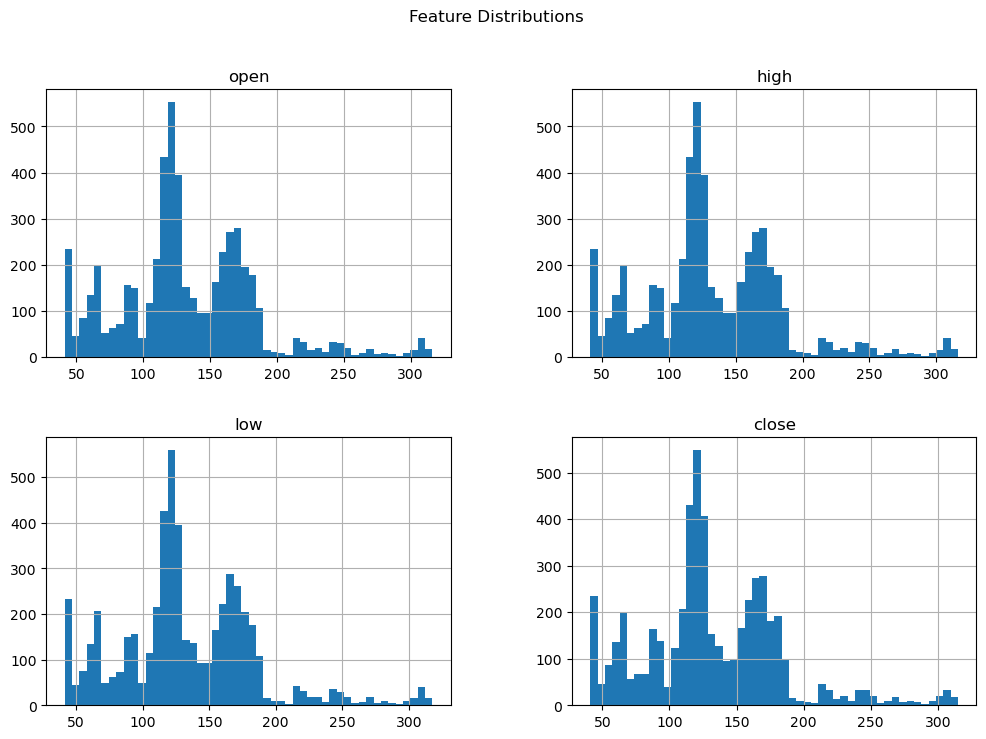

In [13]:
# Plot distributions of key features
plt.figure(figsize=(12,6))
df[['open','high','low','close']].hist(bins=50, figsize=(12,8))
plt.suptitle("Feature Distributions")
plt.show()

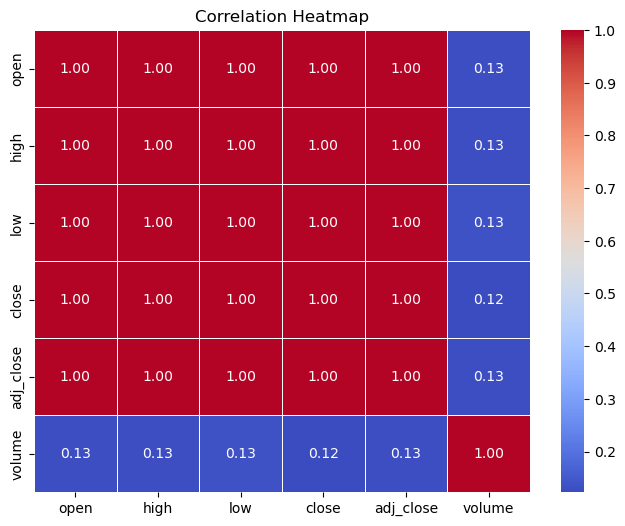

In [14]:
# Step 5: Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [15]:
# Step 6: Feature Selection
X = df[['open','high','low','volume']] # Independent variables
y = df['close'] # Target variable

In [16]:
# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (4172, 4)
Testing Set Shape: (1043, 4)


In [17]:
# Step 8: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Step 9: Predictions
y_pred = model.predict(X_test)

In [19]:
# Step 10: Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("\nMean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Mean Squared Error: 0.25845774875986793
Root Mean Squared Error: 0.5083874002764702
R² Score: 0.9999031349631096


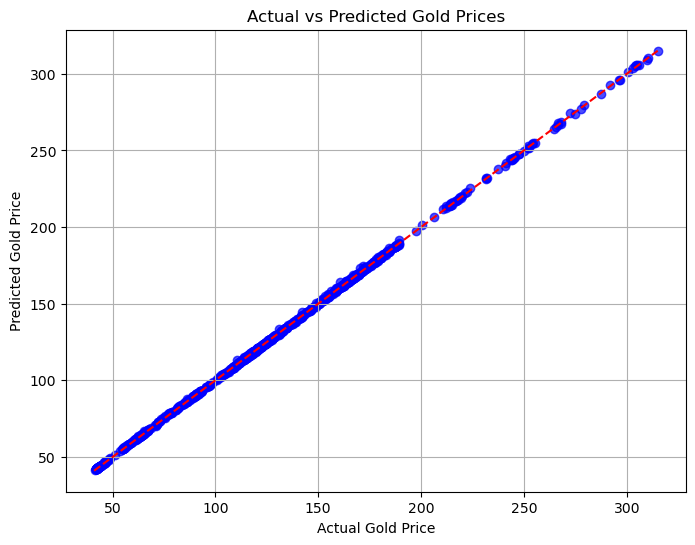

In [20]:
# Step 11: Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.grid()
plt.xlabel("Actual Gold Price")
plt.ylabel("Predicted Gold Price")
plt.title("Actual vs Predicted Gold Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()


Feature Influence on Gold Price:
   Feature   Coefficient
2     low  4.188493e-01
1    high  2.881921e-01
0    open  2.881921e-01
3  volume -5.645234e-08


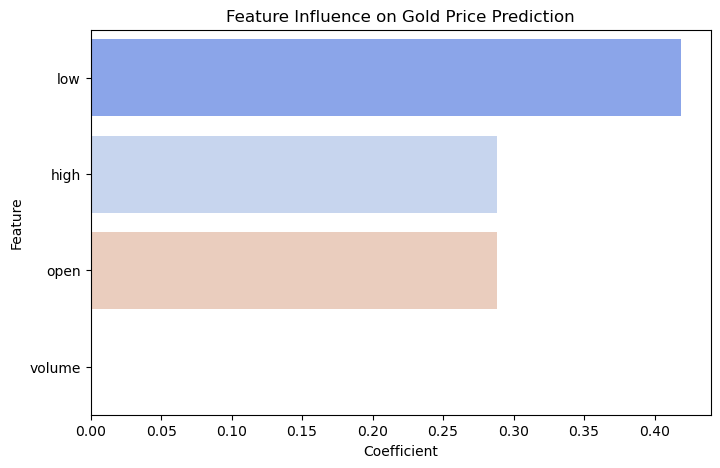

In [21]:
# Step 12: Interpret Coefficients
coefficients = pd.DataFrame({
'Feature': X.columns,
'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)


print("\nFeature Influence on Gold Price:\n", coefficients)


plt.figure(figsize=(8,5))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='coolwarm')
plt.title("Feature Influence on Gold Price Prediction")
plt.show()